# House Price Prediction
To Predict the price of a house by buiding a linear regression model from a given dataset

## Reading and Understanding the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import pandas as pd
import numpy as np

# Data Visualisation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns

In [2]:
housingDS = pd.read_csv(r"C:\Users\dell\Desktop\Housing.csv")

### Data Inspection

In [3]:
housingDS.shape

(545, 13)

In [4]:
housingDS

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### Data Cleaning

In [5]:
# Checking Null values
housingDS.isnull().sum()*100/housingDS.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

### Exploratory Data Analytics 

In [6]:
housingDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Corelation Heatmap 

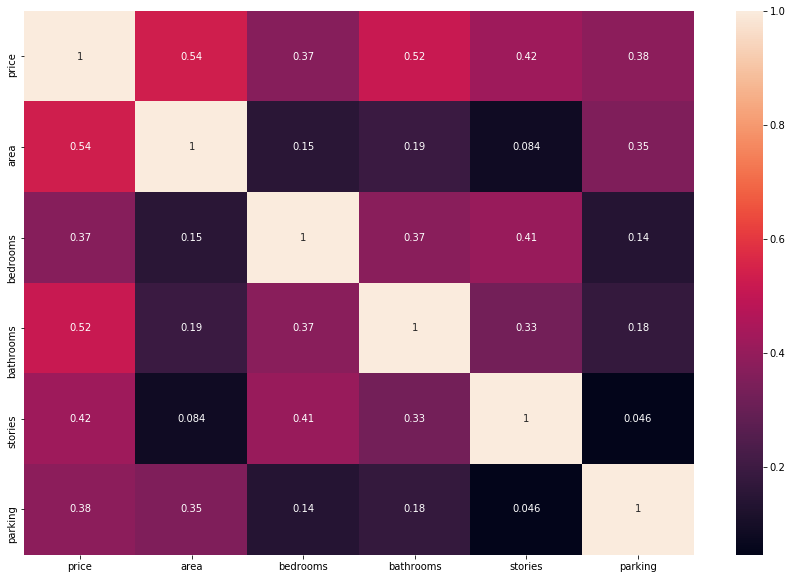

In [7]:
plt.figure(figsize=(15, 10))
sns.heatmap(housingDS.corr(), annot=True)

## Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

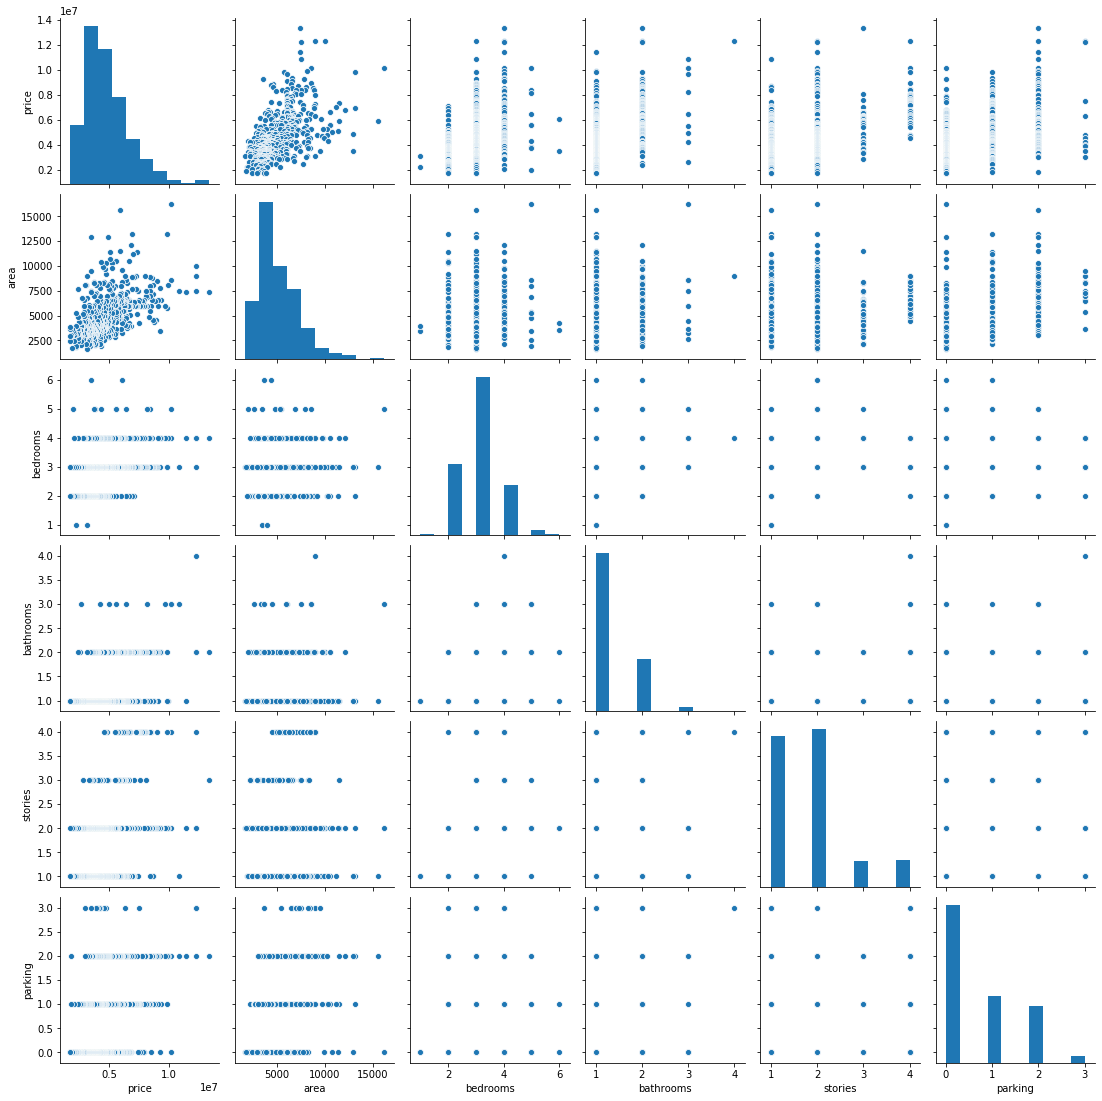

In [8]:
sns.pairplot(housingDS)
plt.show()

### Visualising Categorical Variables

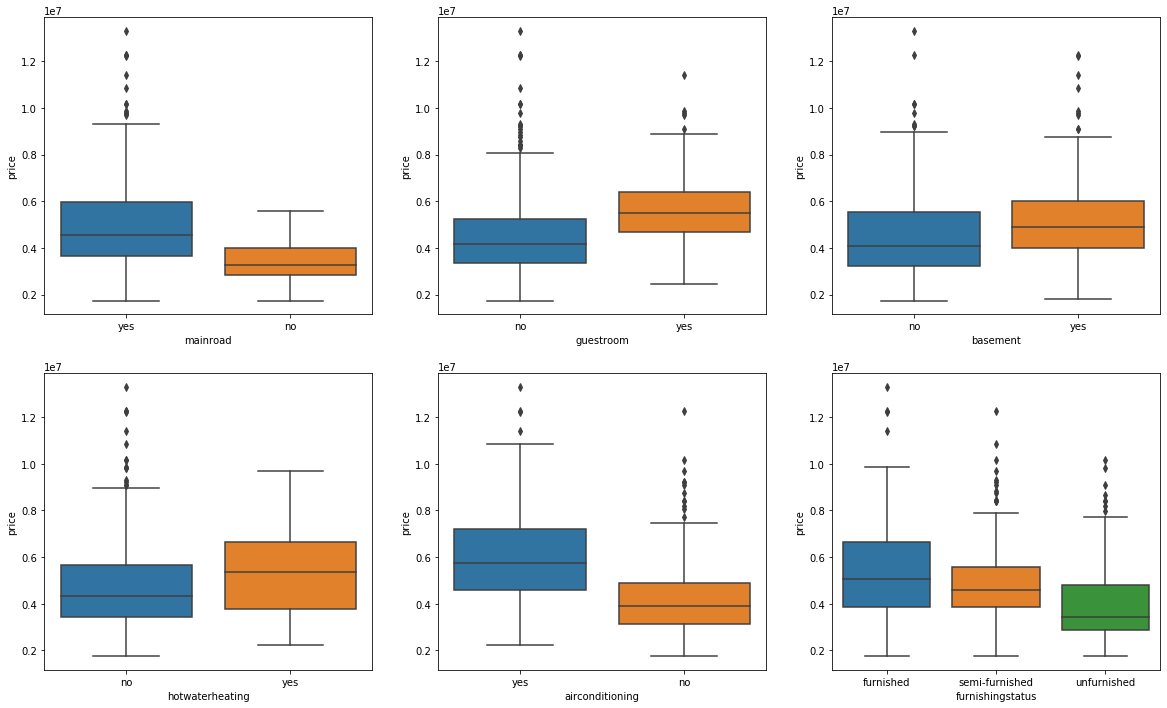

In [9]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housingDS)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housingDS)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housingDS)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housingDS)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housingDS)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housingDS)
plt.show()

## Outlier Analysis

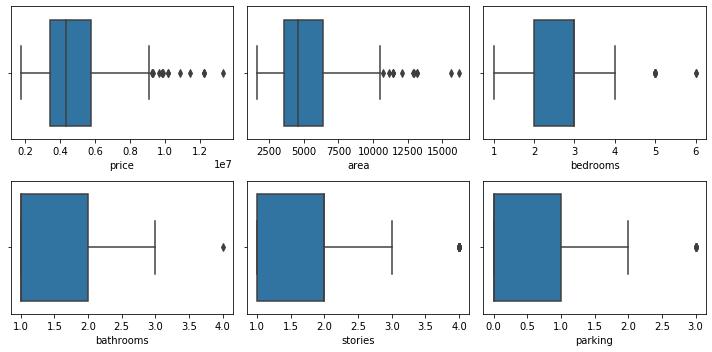

In [10]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housingDS['price'], ax = axs[0,0])
plt2 = sns.boxplot(housingDS['area'], ax = axs[0,1])
plt3 = sns.boxplot(housingDS['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housingDS['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housingDS['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housingDS['parking'], ax = axs[1,2])

plt.tight_layout()

## Linear Data Encoding

In [11]:
#Linear Encoding
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({"yes": 1, "no": 0})
housingDS[varlist] = housingDS[varlist].apply(binary_map)
housingDS.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


## Outlier Treatment

In [12]:
# outlier treatment for bedrooms
Q1 = housingDS.bedrooms.quantile(0.25)
Q3 = housingDS.bedrooms.quantile(0.75)
IQR = Q3 - Q1
housingDS = housingDS[(housingDS.bedrooms >= Q1 - 1.5*IQR) & (housingDS.bedrooms <= Q3 + 1.5*IQR)]

In [13]:
# outlier treatment for area
Q1 = housingDS.area.quantile(0.25)
Q3 = housingDS.area.quantile(0.75)
IQR = Q3 - Q1
housingDS = housingDS[(housingDS.area >= Q1 - 1.5*IQR) & (housingDS.area <= Q3 + 1.5*IQR)]

In [14]:
# outlier treatment for price
Q1 = housingDS.price.quantile(0.25)
Q3 = housingDS.price.quantile(0.75)
IQR = Q3 - Q1
housingDS = housingDS[(housingDS.price >= Q1 - 1.5*IQR) & (housingDS.price <= Q3 + 1.5*IQR)]

## One-Hot Encoding

In [15]:
#One-Hot Encoding for furnishingstatus
status = pd.get_dummies(housingDS['furnishingstatus'], drop_first = True)
housingDS.drop(['furnishingstatus'], axis = 1, inplace = True)
housingDS = pd.concat([housingDS, status], axis = 1)

In [16]:
#One-Hot Encoding for bedrooms
status = pd.get_dummies(housingDS['bedrooms'],prefix="bedroom", prefix_sep='_', drop_first = True)
housingDS.drop(['bedrooms'], axis = 1, inplace = True)
housingDS = pd.concat([housingDS, status], axis = 1)

In [18]:
#One-Hot Encoding for bathrooms
status = pd.get_dummies(housingDS['bathrooms'],prefix="bathroom", prefix_sep='_', drop_first = True)
housingDS.drop(['bathrooms'], axis = 1, inplace = True)
housingDS = pd.concat([housingDS, status], axis = 1)

In [19]:
#One-Hot Encoding for stories
status = pd.get_dummies(housingDS['stories'],prefix="stories", prefix_sep='_', drop_first = True)
housingDS.drop(['stories'], axis = 1, inplace = True)
housingDS = pd.concat([housingDS, status], axis = 1)

In [20]:
#One-Hot Encoding for parking
status = pd.get_dummies(housingDS['parking'],prefix="parking", prefix_sep='_', drop_first = True)
housingDS.drop(['parking'], axis = 1, inplace = True)
housingDS = pd.concat([housingDS, status], axis = 1)

In [21]:
housingDS.head()

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished,unfurnished,...,bedroom_3,bedroom_4,bathroom_2,bathroom_3,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3
19,8855000,6420,1,0,0,0,1,1,1,0,...,1,0,1,0,1,0,0,1,0,0
20,8750000,4320,1,0,1,1,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
21,8680000,7155,1,1,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0,1,0
22,8645000,8050,1,1,1,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
23,8645000,4560,1,1,1,0,1,0,0,0,...,1,0,1,0,1,0,0,1,0,0


## Spiltting data

In [23]:
df=housingDS
y= df.pop('price')
x= df
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
x.head()

,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished,unfurnished,bedroom_2,bedroom_3,bedroom_4,bathroom_2,bathroom_3,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3
19,6420,1,0,0,0,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0
20,4320,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
21,7155,1,1,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0
22,8050,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
23,4560,1,1,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0


## Normalisation of Area Variable

In [24]:
scaler = MinMaxScaler()
x_train['area'] = scaler.fit_transform(x_train['area'].values.reshape(-1,1))
x_test['area'] = scaler.fit_transform(x_test['area'].values.reshape(-1,1))
x_train.describe()

,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,semi-furnished,unfurnished,bedroom_2,bedroom_3,bedroom_4,bathroom_2,bathroom_3,stories_2,stories_3,stories_4,parking_1,parking_2,parking_3
count,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.377189,0.856436,0.165842,0.35396,0.042079,0.311881,0.232673,0.440594,0.336634,0.24505,0.594059,0.158416,0.225248,0.012376,0.418317,0.069307,0.074257,0.230198,0.188119,0.022277
std,0.211491,0.351082,0.372400,0.47879,0.201019,0.463836,0.423060,0.497074,0.473144,0.43065,0.491682,0.365583,0.418263,0.110695,0.493894,0.254290,0.262514,0.421481,0.391292,0.147767
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.218136,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.322034,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.527910,1.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Linear Regression

In [25]:
lm=LinearRegression()
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred= lm.predict(x_test)
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
117,5950000,4.314418e+06
124,5950000,6.999398e+06
516,2450000,3.017269e+06
377,3640000,4.018260e+06
434,3290000,3.345347e+06
...,...,...
81,6615000,6.015849e+06
484,2870000,2.095541e+06
85,6510000,6.864738e+06
534,2100000,2.688125e+06


# Model Analysis

## RMSE

In [27]:
from sklearn.metrics import mean_squared_error 
import math 
# Calculation of Mean Squared Error (MSE) 
print('RMSE-',math.sqrt(mean_squared_error(y_test,y_pred)))

RMSE- 855552.3040466666


### Intercept of Model

In [29]:
print('Intercept-',lm.intercept_)

Intercept- 2171696.239157441


### Coefficients

In [30]:
dfCoef=pd.DataFrame(lm.coef_,x_test.columns,  columns=['Coefficient'])
dfCoef

,Coefficient
area,1.847552e+06
mainroad,4.321801e+05
guestroom,3.597389e+05
basement,2.581867e+05
hotwaterheating,3.835228e+05
airconditioning,7.194025e+05
prefarea,4.107010e+05
semi-furnished,8.823626e+04
unfurnished,-3.810262e+05
bedroom_2,6.161582e+04


## Plot b/w actual and predicted values

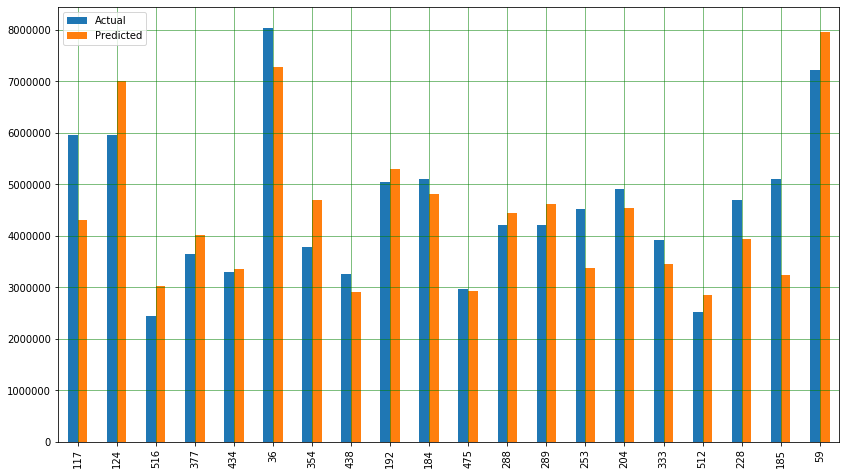

In [31]:
df1 = df.head(20)
df1.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

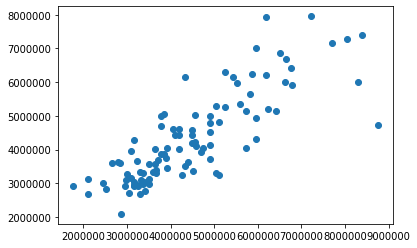

In [32]:
plt.scatter(y_test,y_pred)

## Distribution of Error in data

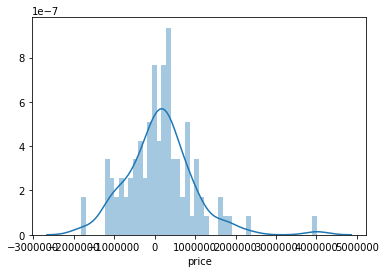

In [33]:
sns.distplot((y_test-y_pred),bins=50);

## Check for relation b/w area and price

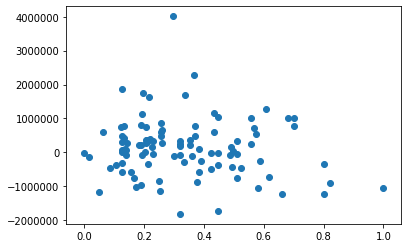

In [34]:
plt.scatter(x_test['area'],(y_test-y_pred)); 
## no relation found from graph, error is random

# Analysis of Factors responsible for High pricing of House 

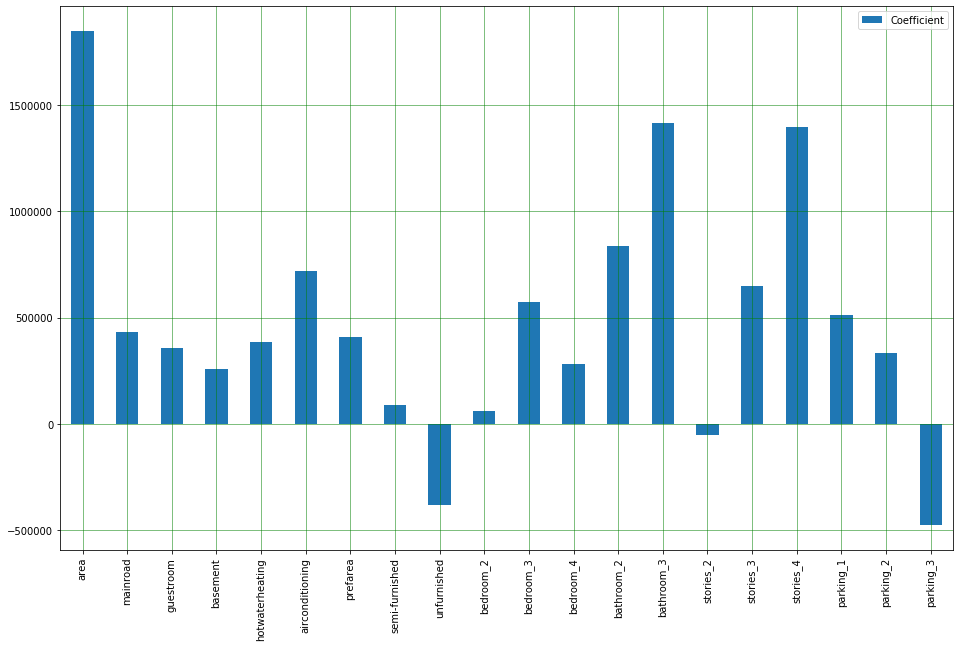

In [35]:
dfCoef.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()